In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv("car_data.csv")

In [5]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


## Tasks, Part 1
1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [6]:
input_data = df[['Mileage']]
output_data = df[['Price']]

regr = linear_model.LinearRegression()
regr.fit(input_data, output_data)
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[[-0.1725205]] [ 24764.55900606]
0.0204634473235


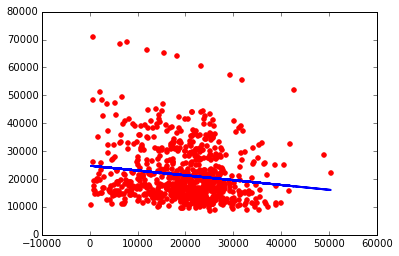

In [7]:
plt.scatter(input_data, output_data, color='red')
plt.plot(input_data, regr.predict(input_data), linewidth=2)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [8]:
import itertools
possible_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combos = []


for x in range(1, len(possible_columns)):
    combos.append(list(itertools.combinations(possible_columns, x)))


inputs = []

for x in combos:
    for y in x:
        inputs.append(list(y))
        
results = []

for x in inputs:
    input_data = df[x]
    regr = linear_model.LinearRegression()
    regr.fit(input_data, output_data)
    results.append([', '.join(x), regr.score(input_data, output_data)])
    
results = pd.DataFrame(results, columns=('Grouping', 'Score'))

results.sort_index(by='Score', ascending=[False])

,Grouping,Score
123,"Mileage, Cylinder, Doors, Cruise, Sound, Leather",0.445691
120,"Mileage, Cylinder, Liter, Doors, Cruise, Leather",0.437806
105,"Mileage, Cylinder, Doors, Cruise, Leather",0.436940
122,"Mileage, Cylinder, Liter, Cruise, Sound, Leather",0.430141
107,"Mileage, Cylinder, Cruise, Sound, Leather",0.430018
125,"Cylinder, Liter, Doors, Cruise, Sound, Leather",0.426535
117,"Cylinder, Doors, Cruise, Sound, Leather",0.425768
124,"Mileage, Liter, Doors, Cruise, Sound, Leather",0.424828
119,"Mileage, Cylinder, Liter, Doors, Cruise, Sound",0.424418
104,"Mileage, Cylinder, Doors, Cruise, Sound",0.424097


## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [9]:
columns = ['Make']#, 'Model', 'Type']

for x in columns:
    for elem in df[x].unique():
        df[str(elem)] = df[x] == elem

In [10]:
df.keys()

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac',
       'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype='object')

In [11]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,True,False,False,False,False,False
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True,False,False,False,False,False
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True,False,False,False,False,False
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,True,False,False,False,False,False
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,True,False,False,False,False,False
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True,False,False,False,False,False
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True,False,False,False,False,False
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True,False,False,False,False,False
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,True,False,False,False,False,False
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,True,False,False,False,False,False


In [22]:
possible_columns = []

for x in df.keys():
    possible_columns.append(x)
    
remove = ['Make', 'Model', 'Trim', 'Type']

for x in remove:
    possible_columns.remove(x)
        
    
combos = []


for x in range(1, len(possible_columns)):
    combos.append(list(itertools.combinations(possible_columns, x)))

print(combos)

# inputs = []

# for x in combos:
#     for y in x:
#         inputs.append(list(y))
        
# results = []

# for x in inputs:
#     input_data = df[x]
#     regr = linear_model.LinearRegression()
#     regr.fit(input_data, output_data)
#     results.append([', '.join(x), regr.score(input_data, output_data)])
    
# results = pd.DataFrame(results, columns=('Grouping', 'Score'))

# results.sort_index(by='Score', ascending=[False])

[[('Price',), ('Mileage',), ('Cylinder',), ('Liter',), ('Doors',), ('Cruise',), ('Sound',), ('Leather',), ('Buick',), ('Cadillac',), ('Chevrolet',), ('Pontiac',), ('SAAB',), ('Saturn',)], [('Price', 'Mileage'), ('Price', 'Cylinder'), ('Price', 'Liter'), ('Price', 'Doors'), ('Price', 'Cruise'), ('Price', 'Sound'), ('Price', 'Leather'), ('Price', 'Buick'), ('Price', 'Cadillac'), ('Price', 'Chevrolet'), ('Price', 'Pontiac'), ('Price', 'SAAB'), ('Price', 'Saturn'), ('Mileage', 'Cylinder'), ('Mileage', 'Liter'), ('Mileage', 'Doors'), ('Mileage', 'Cruise'), ('Mileage', 'Sound'), ('Mileage', 'Leather'), ('Mileage', 'Buick'), ('Mileage', 'Cadillac'), ('Mileage', 'Chevrolet'), ('Mileage', 'Pontiac'), ('Mileage', 'SAAB'), ('Mileage', 'Saturn'), ('Cylinder', 'Liter'), ('Cylinder', 'Doors'), ('Cylinder', 'Cruise'), ('Cylinder', 'Sound'), ('Cylinder', 'Leather'), ('Cylinder', 'Buick'), ('Cylinder', 'Cadillac'), ('Cylinder', 'Chevrolet'), ('Cylinder', 'Pontiac'), ('Cylinder', 'SAAB'), ('Cylinder', '

In [23]:
print(len(combos))

13


In [24]:
True + True

2

In [25]:
inputs = []

for x in combos:
    for y in x:
        inputs.append(list(y))
        
results = []

for x in inputs:
    input_data = df[x]
    regr = linear_model.LinearRegression()
    regr.fit(input_data, output_data)
    results.append([', '.join(x), regr.score(input_data, output_data)])
    
results = pd.DataFrame(results, columns=('Grouping', 'Score'))

results.sort_index(by='Score', ascending=[False])

['Price']
['Mileage']
['Cylinder']
['Liter']
['Doors']
['Cruise']
['Sound']
['Leather']
['Buick']
['Cadillac']
['Chevrolet']
['Pontiac']
['SAAB']
['Saturn']
['Price', 'Mileage']
['Price', 'Cylinder']
['Price', 'Liter']
['Price', 'Doors']
['Price', 'Cruise']
['Price', 'Sound']
['Price', 'Leather']
['Price', 'Buick']
['Price', 'Cadillac']
['Price', 'Chevrolet']
['Price', 'Pontiac']
['Price', 'SAAB']
['Price', 'Saturn']
['Mileage', 'Cylinder']
['Mileage', 'Liter']
['Mileage', 'Doors']
['Mileage', 'Cruise']
['Mileage', 'Sound']
['Mileage', 'Leather']
['Mileage', 'Buick']
['Mileage', 'Cadillac']
['Mileage', 'Chevrolet']
['Mileage', 'Pontiac']
['Mileage', 'SAAB']
['Mileage', 'Saturn']
['Cylinder', 'Liter']
['Cylinder', 'Doors']
['Cylinder', 'Cruise']
['Cylinder', 'Sound']
['Cylinder', 'Leather']
['Cylinder', 'Buick']
['Cylinder', 'Cadillac']
['Cylinder', 'Chevrolet']
['Cylinder', 'Pontiac']
['Cylinder', 'SAAB']
['Cylinder', 'Saturn']
['Liter', 'Doors']
['Liter', 'Cruise']
['Liter', 'Sound']


,Grouping,Score
0,Price,1.000000
11264,"Price, Cylinder, Cruise, Cadillac, Chevrolet, ...",1.000000
10914,"Price, Cylinder, Liter, Doors, Sound, Cadillac...",1.000000
10915,"Price, Cylinder, Liter, Doors, Sound, Cadillac...",1.000000
10916,"Price, Cylinder, Liter, Doors, Sound, Cadillac...",1.000000
10917,"Price, Cylinder, Liter, Doors, Sound, Cadillac...",1.000000
10918,"Price, Cylinder, Liter, Doors, Sound, Chevrole...",1.000000
10919,"Price, Cylinder, Liter, Doors, Sound, Chevrole...",1.000000
10920,"Price, Cylinder, Liter, Doors, Sound, Chevrole...",1.000000
10921,"Price, Cylinder, Liter, Doors, Sound, Pontiac,...",1.000000


In [16]:
len(inputs)

262142